In [16]:
import os
import notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
import re

In [74]:
directory = 'c:\\Users\\Callsoom\\Documents\\ML-Getting-Started\\house_price_prediction'
train_data_path = os.path.join(directory, 'train.csv')
test_data_path = os.path.join(directory, 'test.csv')
train_data_raw = pd.read_csv(train_data_path)
test_data_raw = pd.read_csv(test_data_path)



In [75]:

def pythonize_field_names(field_names):
    pythonized_names = []
    
    for name in field_names:
        if name[0].isupper() and name[1:].islower():
            # If the field starts with a capital letter and has no other capitals
            pythonized_names.append(name.lower())
        else:
            # Handle fields with more than one capital letter
            parts = re.split('([A-Z]+)', name)
            new_name = []
            for part in parts:
                if part.isupper():
                    if len(part) > 1:
                        # More than one consecutive uppercase, underscore only before the first
                        new_name.append('_' + part[0].lower() + part[1:].lower())
                    else:
                        # Single uppercase letter, prefix with underscore
                        new_name.append('_' + part.lower())
                else:
                    new_name.append(part.lower())
            pythonized_names.append(''.join(new_name).lstrip('_'))
    
    return pythonized_names

In [76]:
train_data_raw.columns = pythonize_field_names(list(train_data_raw.columns))
test_data_raw.columns = pythonize_field_names(list(test_data_raw.columns))

In [90]:
def fill_missing(df):
    df = df.copy()
    fillers = {
    'bsmt_qual': 'no', 'bsmt_cond': 'no', 'alley': 'no', 'bsmt_fin_type2': 'no', 'garage_type': 'no', 'bsmt_fin_type1': 'no',
    'mas_vnr_type': 'no', 'fire_place_qu': 'no', 'bsmt_exposure': 'no', 'fence': 'no', 'garage_cond': 'no',
    'misc_feature': 'no', 'pool_qc': 'no', 'garage_qual': 'no', 'garage_finish': 'no',
    'electrical': df['electrical'].mode()[0],
    'mas_vnr_area': 0, 'garage_yr_blt': -1,
    'lot_frontage': df['lot_frontage'].mean()
}
    df.fillna(fillers, inplace=True)
    return df

def feature_engineering(df):
    df = df.copy()
    df['property_age'] = 2024 - df['year_built']
    
    return df

# def preprocessing(df):
#     df = df.copy()
#     numerical_cols = list(df.select_dtypes(include=['int64', 'float64']))
#     numerical_cols.remove('id')
#     numerical_cols.remove('sale_price')
#     categorical_cols = list(df.select_dtypes(include=['object', 'category']))
#     scaler = StandardScaler()

#     scaled = scaler.fit_transform(df[numerical_cols])
#     scaled_df = pd.DataFrame(scaled, columns=numerical_cols)
#     remaining_cols = list(set(df.columns) - set(numerical_cols) - set(categorical_cols))
#     df = pd.concat([df[remaining_cols], scaled_df, df[categorical_cols]], axis=1)
#     df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
#     return df

In [101]:
train_data = fill_missing(train_data_raw)
test_data = fill_missing(test_data_raw)
train_data = feature_engineering(train_data)
test_data = feature_engineering(test_data)
# train_data = preprocessing(train_data)
# test_data = preprocessing(test_data)

numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove the target column from numerical columns list if present
if 'sale_price' in numerical_cols:
    numerical_cols.remove('sale_price')

# Remove the identifier column from the lists if present
if 'id' in numerical_cols:
    numerical_cols.remove('id')
if 'id' in categorical_cols:
    categorical_cols.remove('id')

X = train_data.drop(columns=['id', 'sale_price'])
y = train_data['sale_price']


# Scale numerical features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_cols])

# Encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical = encoder.fit_transform(X[categorical_cols])

# Combine scaled numerical and encoded categorical features
X_preprocessed = np.hstack([X_numerical, X_categorical])

X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)



In [103]:
model = LinearRegression()
model.fit(X_train, y_train)

val_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_pred))
print("Validation RMSE:", rmse)

scores = cross_val_score(model, X_preprocessed, y, cv=10, scoring='neg_mean_squared_error')
average_rmse = np.sqrt(-scores.mean())
print('Average RMSE from cross-validation:', average_rmse)

Validation RMSE: 257879402117662.94
Average RMSE from cross-validation: 249477311376154.0


In [18]:
directory = 'c:\\Users\\Callsoom\\Documents\\ML-Getting-Started\\house_price_prediction'
train_data_path = os.path.join(directory, 'train.csv')
test_data_path = os.path.join(directory, 'test.csv')
train_data_raw = pd.read_csv(train_data_path)
test_data_raw = pd.read_csv(test_data_path)


def fill_missing(df):
    df = df.copy()
    fillers = {
        'BsmtQual': 'No', 'BsmtCond': 'No', 'Alley': 'No', 'BsmtFinType2': 'No', 'GarageType': 'No', 'BsmtFinType1': 'No',
        'MasVnrType': 'No', 'FireplaceQu': 'No', 'BsmtExposure': 'No', 'Fence': 'No', 'GarageCond': 'No',
        'MiscFeature': 'No', 'PoolQC': 'No', 'GarageQual': 'No', 'GarageFinish': 'No',
        'Electrical': df['Electrical'].mode()[0],
        'MasVnrArea': 0, 'GarageYrBlt': -1,
        'LotFrontage': df['LotFrontage'].mean()
    }
    df.fillna(fillers, inplace=True)
    return df

def feature_engineering(df):
    df = df.copy()
    df['PropertyAge'] = 2024 - df['YearBuilt']
    return df

# Apply filling missing values and feature engineering
train_data = fill_missing(train_data_raw)
test_data = fill_missing(test_data_raw)
train_data = feature_engineering(train_data)
test_data = feature_engineering(test_data)

# Define target and features
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove the target column from numerical columns list if present
if 'SalePrice' in numerical_cols:
    numerical_cols.remove('SalePrice')

# Remove the identifier column from the lists if present
if 'Id' in numerical_cols:
    numerical_cols.remove('Id')
if 'Id' in categorical_cols:
    categorical_cols.remove('Id')

# Separate features and target
X = train_data.drop(columns=['SalePrice', 'Id'])  # Assuming 'SalePrice' is the target and 'Id' is an identifier
y = train_data['SalePrice']

# Scale numerical features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_cols])

# Encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical = encoder.fit_transform(X[categorical_cols])

# Combine scaled numerical and encoded categorical features
X_preprocessed = np.hstack([X_numerical, X_categorical])

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Train the model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Predict and calculate RMSE on validation set
val_predictions = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print("Validation RMSE:", rmse)

# Optionally, perform cross-validation
scores = cross_val_score(model, X_preprocessed, y, cv=5, scoring='neg_mean_squared_error')
average_rmse = np.sqrt(-scores.mean())
print("Average RMSE from cross-validation:", average_rmse)

# # Preprocess test data and predict for submission
# X_test_numerical = scaler.transform(test_data[numerical_cols])
# X_test_categorical = encoder.transform(test_data[categorical_cols])
# X_test_preprocessed = np.hstack([X_test_numerical, X_test_categorical])
# test_predictions = model.predict(X_test_preprocessed)

Validation RMSE: 29733.735182588112
Average RMSE from cross-validation: 33167.439071015695


In [5]:
print(f'X_numerical shape: {X_numerical.shape}')
print(f'X_categorical shape: {X_categorical.shape}')
print(f'X_preprocessed shape: {X_preprocessed.shape}')

X_numerical shape: (1460, 37)
X_categorical shape: (1460, 265)
X_preprocessed shape: (1460, 302)


In [9]:
X_numerical 

array([[ 0.07337496, -0.22937175, -0.20714171, ..., -1.5991111 ,
         0.13877749, -1.05099379],
       [-0.87256276,  0.4519361 , -0.09188637, ..., -0.48911005,
        -0.61443862, -0.15673371],
       [ 0.07337496, -0.09311018,  0.07347998, ...,  0.99089135,
         0.13877749, -0.9847523 ],
       ...,
       [ 0.30985939, -0.18395123, -0.14781027, ..., -0.48911005,
         1.64520971,  1.00249232],
       [-0.87256276, -0.09311018, -0.08016039, ..., -0.8591104 ,
         1.64520971,  0.70440562],
       [-0.87256276,  0.22483348, -0.05811155, ..., -0.1191097 ,
         0.13877749,  0.20759447]])

In [11]:
len(train_data.select_dtypes(include=['int64', 'float64']).columns.tolist())

39

In [12]:
len(train_data.select_dtypes(include=['object', 'category']).columns.tolist())

43

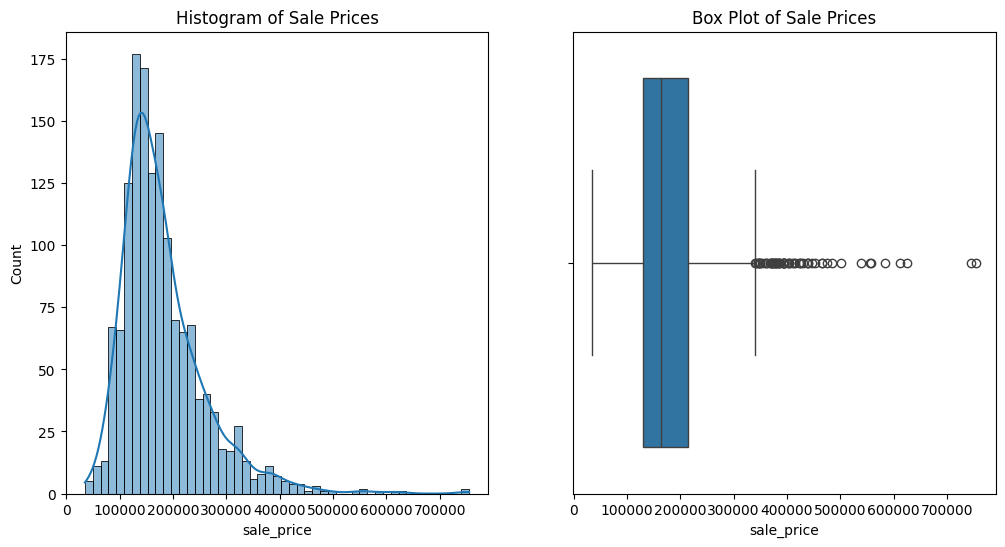

In [38]:
plt.figure(figsize=(12, 6))
# pd.option_context('mode.use_inf_as_na', True)
plt.subplot(1, 2, 1)
sns.histplot(train_data['sale_price'], kde=True)
plt.title('Histogram of Sale Prices')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_data['sale_price'])
plt.title('Box Plot of Sale Prices')
plt.show()

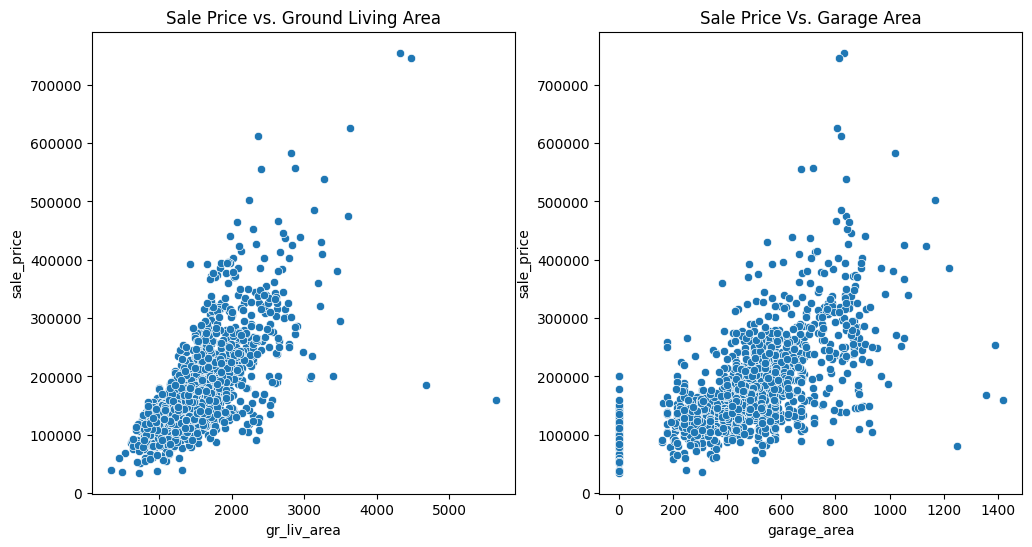

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='gr_liv_area', y='sale_price', data=train_data)
plt.title('Sale Price vs. Ground Living Area')

plt.subplot(1, 2, 2)
sns.scatterplot(x='garage_area', y='sale_price', data=train_data)
plt.title('Sale Price Vs. Garage Area')
plt.show()

In [40]:
train_data[(train_data['gr_liv_area'] >= 4000) & (train_data['sale_price'] < 300000)]

,id,mssub_class,mszoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,sale_price,property_age
523,524,60,RL,130.0,40094,Pave,no,IR1,Bnk,AllPub,...,no,no,no,0,10,2007,New,Partial,184750,17
1298,1299,60,RL,313.0,63887,Pave,no,IR3,Bnk,AllPub,...,Gd,no,no,0,1,2008,New,Partial,160000,16


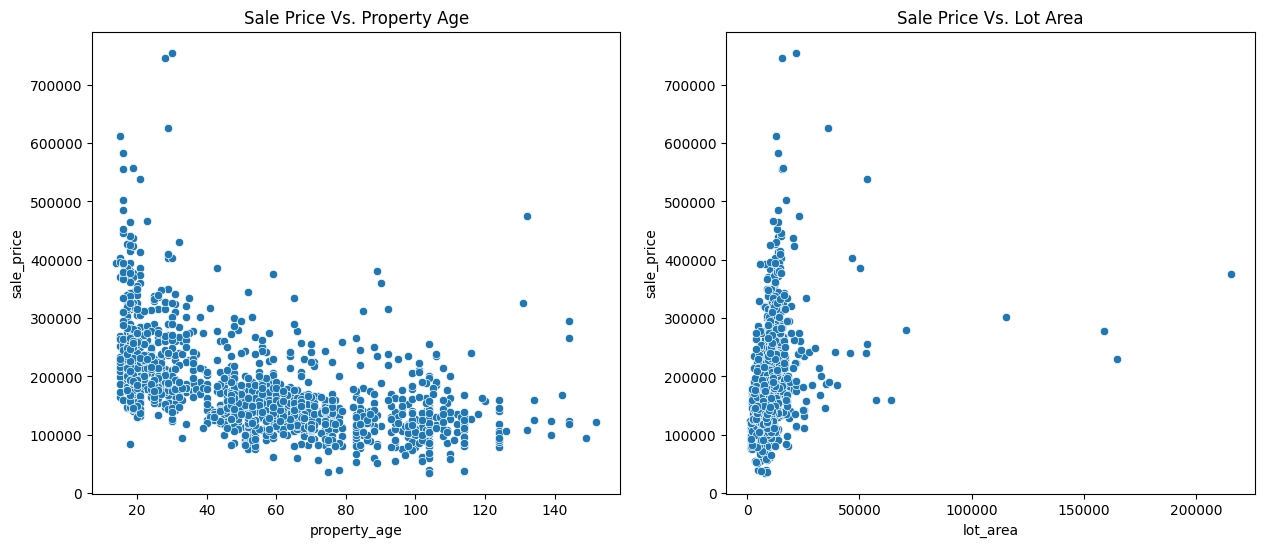

In [43]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='property_age', y='sale_price', data=train_data)
plt.title('Sale Price Vs. Property Age')

plt.subplot(1, 2, 2)
sns.scatterplot(x='lot_area', y='sale_price', data=train_data)
plt.title('Sale Price Vs. Lot Area')
plt.show()

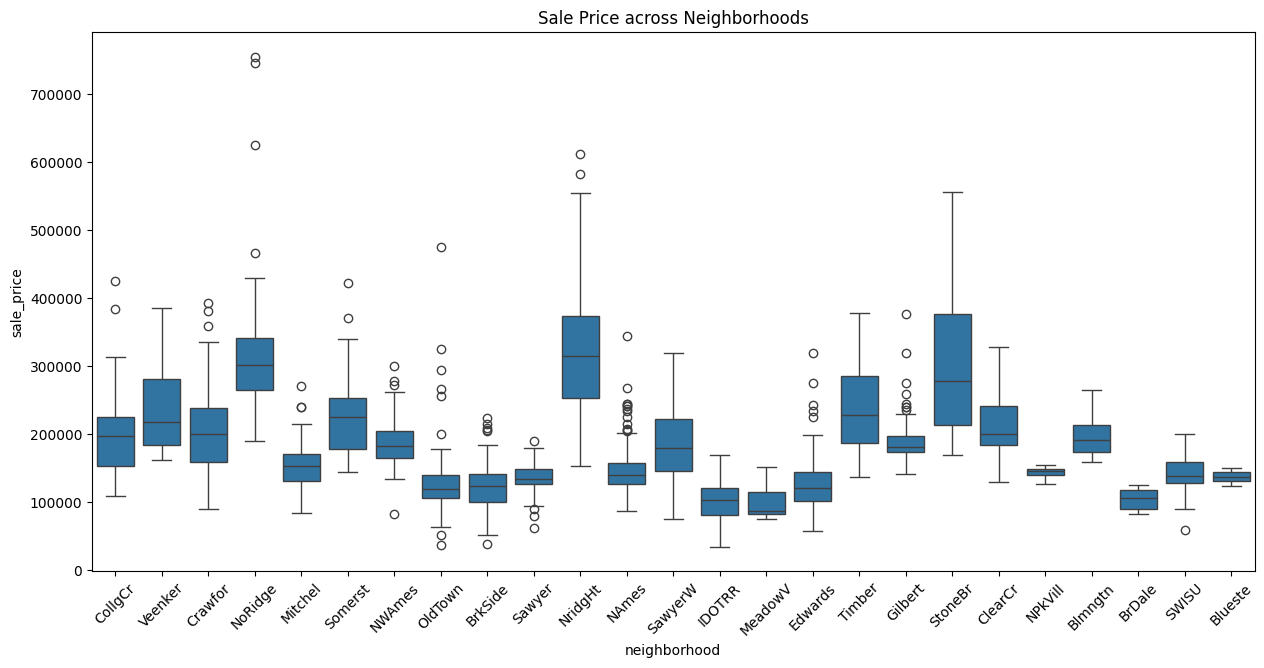

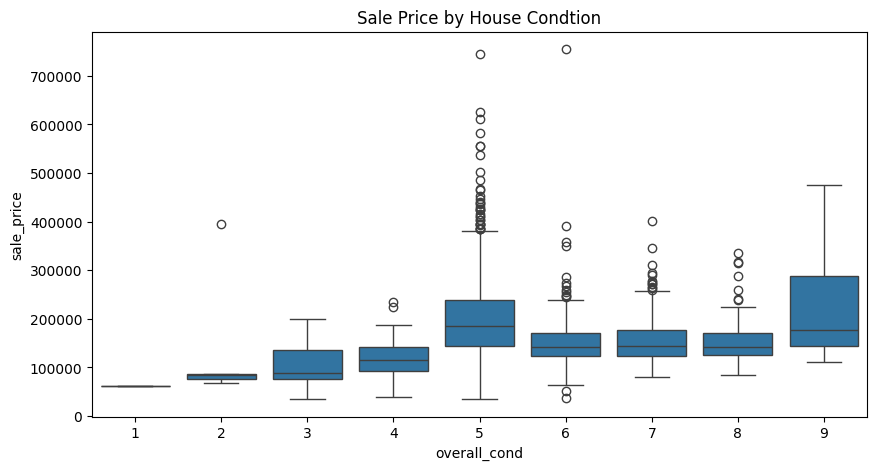

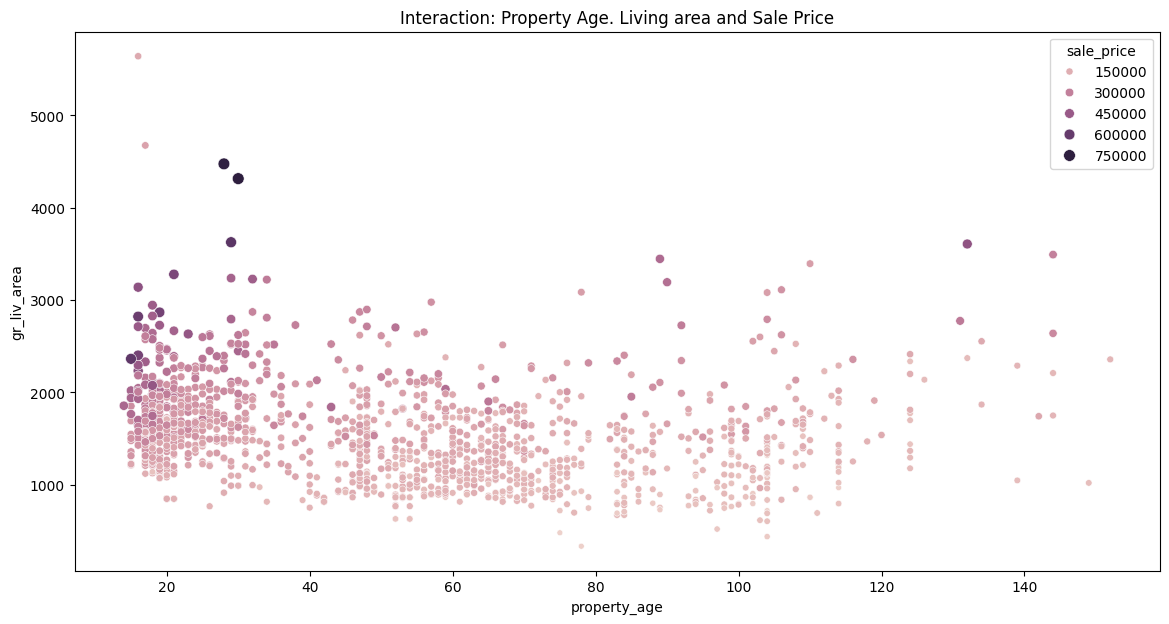

In [47]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='neighborhood', y='sale_price', data=train_data)
plt.xticks(rotation=45)
plt.title('Sale Price across Neighborhoods')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='overall_cond', y='sale_price', data=train_data)
plt.title('Sale Price by House Condtion')
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(x='property_age', y='gr_liv_area', size='sale_price', hue='sale_price', data=train_data)
plt.title('Interaction: Property Age. Living area and Sale Price')
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numerical_cols = list(train_data.select_dtypes(include=['int64', 'float64']))
categorical_cols = list(train_data.select_dtypes(include=['object', 'category']))
scaler = StandardScaler()

scaled = scaler.fit_transform(train_data[numerical_cols])
scaled_df = pd.DataFrame(scaled, columns=numerical_cols)

In [50]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [62]:
scaler = StandardScaler()

scaled = scaler.fit_transform(train_data[numerical_cols])
scaled_df = pd.DataFrame(scaled, columns=numerical_cols)


In [66]:
remaining_cols = list(set(train_data.columns) - set(numerical_cols) - set(categorical_cols))
train_data = pd.concat([train_data[remaining_cols], scaled_df, train_data[categorical_cols]], axis=1)
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
train_data = train_data.drop(['id'], axis=1)

In [67]:
train_data.head()

,mssub_class,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod_add,mas_vnr_area,bsmt_fin_sf1,bsmt_fin_sf2,...,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,False,False,False,False,True,False,False,False,True,False
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,False,False,False,False,True,False,False,False,True,False
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,False,False,False,False,True,False,False,False,True,False
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,False,False,False,False,True,False,False,False,False,False
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,False,False,False,False,True,False,False,False,True,False


In [68]:
remaining_cols

[]